In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

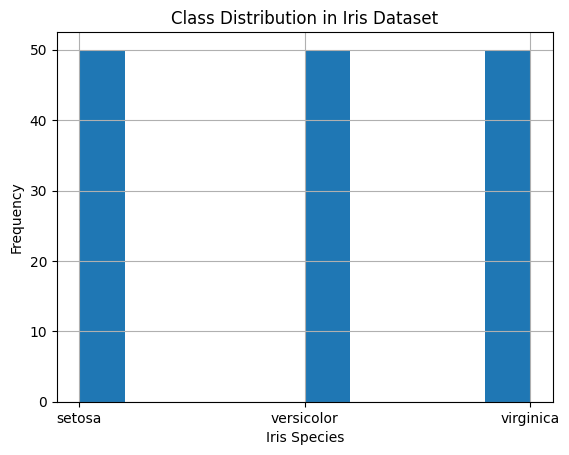

Training set dimensions (X_train, y_train): (112, 4), (112,)
Test set dimensions (X_test, y_test): (38, 4), (38,)
KNN Train Accuracy: 1.0000
KNN Test Accuracy: 0.8684
Most Frequent Model Accuracy: 0.3750
Stratified Model Accuracy: 0.2946
Confusion matrix:
 [[ 8  0  0]
 [ 0 10  3]
 [ 0  2 15]]
Accuracy from the confusion matrix: 0.868421052631579


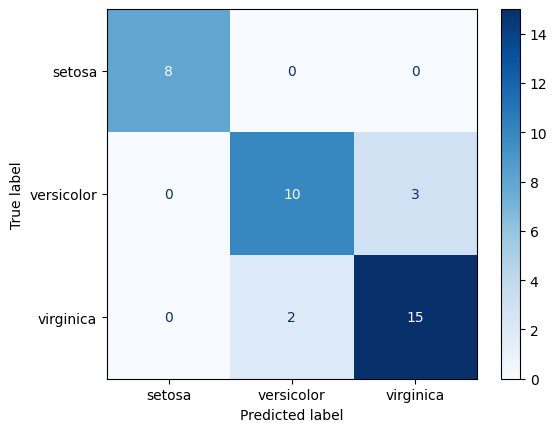

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.9912280701754387
Best training accuracy: 0.9910714285714286
Best test accuracy: 0.9210526315789473


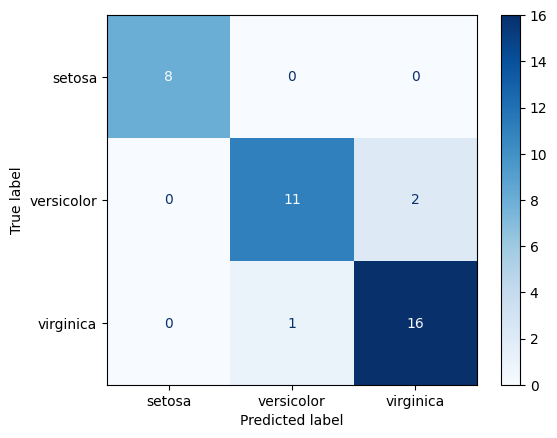

In [1]:
# Accuracy function
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Accuracy of the most frequent model
def accuracy_most_frequent(y_train):
    most_common = np.bincount(y_train).argmax()
    return np.mean(y_train == most_common)

# (Optional) Accuracy of the stratified model
def accuracy_stratified(y_train, size, seed=29):
    np.random.seed(seed)
    unique, counts = np.unique(y_train, return_counts=True)
    probabilities = counts / len(y_train)
    random_labels = np.random.choice(unique, size=size, p=probabilities)
    return np.mean(random_labels == y_train)

# Hyperparameter tuning
def cv_knearest_classifier(X, y):
    knn2 = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 26)}
    grid_search = GridSearchCV(knn2, param_grid, cv=3)
    grid_search.fit(X, y)
    return grid_search

if __name__ == "__main__":
    # load iris dataset
    iris = load_iris()
    print(iris.data)

    print("\nShape of data matrix:", iris.data.shape)
    print("Number of target entries:", len(iris.target))

    # Print names of labels and of features
    print("\nFeature names:", iris.feature_names)
    print("Target names:", iris.target_names)

    # (optional) Use classes distribution (histogram) to check if iris dataset is balanced:
    temp = pd.Series(iris.target)
    target_str = temp.apply(lambda i: iris.target_names[i])

    # and use 'pandas.Series.hist' function to plot histogram
    target_str.hist()
    plt.xlabel('Iris Species')
    plt.ylabel('Frequency')
    plt.title('Class Distribution in Iris Dataset')
    plt.show()

    # Fortunately, the iris dataset is balanced, so it has the same number of samples for each species.
    # Balanced datasets make it simple to proceed directly to the classification phase. 
    # In the opposite case we would have to take additional steps to reduce the negative effects 
    # (e.g. collect more data) or use other algorithms than the k-Nearest Neighbors 
    # (e.g. Random Forests).

    # create train and test split with the ratio 75:25 and print their dimensions
    X = iris.data  # Features
    y = iris.target  # Target labels

    # Split the data into train and test sets (75:25 ratio)
    random_state = 29
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

    # Print the dimensions of the train and test sets
    print(f"Training set dimensions (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"Test set dimensions (X_test, y_test): {X_test.shape}, {y_test.shape}")

    # create a k-nn, with k = 1
    knn = KNeighborsClassifier(n_neighbors=1)

    # train the classifier on the train set
    knn.fit(X_train, y_train)

    # predict labels first for train and then for test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # implement and use 'compute_accuracy' to evaluate your model by calculating accuracy on train and test set
    train_accuracy = compute_accuracy(y_train, y_train_pred)
    test_accuracy = compute_accuracy(y_test, y_test_pred)

    # print both accuracies
    print(f"KNN Train Accuracy: {train_accuracy:.4f}")
    print(f"KNN Test Accuracy: {test_accuracy:.4f}")  

    # implement and use 'accuracy_most_frequent' to compute accuracy of most frequent model
    most_frequent_accuracy = accuracy_most_frequent(y_train)
    print(f"Most Frequent Model Accuracy: {most_frequent_accuracy:.4f}")

    # (optional) implement and use 'accuracy_stratified' to compute and print accuracy of the stratified model
    stratified_accuracy = accuracy_stratified(y_train, len(y_train))
    print(f"Stratified Model Accuracy: {stratified_accuracy:.4f}")

    # Task 5: Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion matrix:\n", cm)

    # Accuracy from the confusion matrix
    confusion_matrix_accuracy = np.trace(cm) / np.sum(cm)
    print("Accuracy from the confusion matrix:", confusion_matrix_accuracy)

    # Heatmap of confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Task 6: Hyperparameter tuning
    grid_search = cv_knearest_classifier(X_train, y_train)

    # Task 7: Testing
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    best_knn = grid_search.best_estimator_

    # Compute accuracy with the best estimator
    best_train_accuracy = compute_accuracy(y_train, best_knn.predict(X_train))
    best_test_accuracy = compute_accuracy(y_test, best_knn.predict(X_test))

    print("Best training accuracy:", best_train_accuracy)
    print("Best test accuracy:", best_test_accuracy)

    # Plot confusion matrix for the best estimator
    best_cm = confusion_matrix(y_test, best_knn.predict(X_test))
    best_disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=iris.target_names)
    best_disp.plot(cmap=plt.cm.Blues)
    plt.show()